<font size = "5"> **Chapter 1: [Introduction](CH1_00-Introduction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Prerequisites


part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Fall 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.



## Language
The notebooks are all in python 3. 

At this point the common version is python 3.7

## Packages
The idea behind any python program is to make use of the hghly efficient libraries that already exist.

I use [anaconda3](https://www.anaconda.com/distribution/) (not miniconda) which is available for all major operating systems.

We us a few modules that come with every python installation, like:

* math
* sys
* os

We use mostly the common packages for scientific computing in python (all included in anaconda3)
The most important ones are:
* [Numpy](https://www.numpy.org/) - the numerical library
* [Scipy](https://www.scipy.org/scipylib/index.html) the scientific library
* [Matplotlib](https://www.matplotlib.org/) the interactive plotting library 


These notebooks are expected to be installed on your computer to run the notebooks of this book.


For specialist applications we do not reinvent the wheel and use those on an as needed basis.
Example is the library to register a stack of images:
* [SimpleITK](https://www.simpleitk.org)
integration of AI in image analysis and for high performing computer algrothyms
* [pyNSID](https://pycroscopy.github.io/pyNSID/about.html)
the atomistic simulation program is used for crystallographic data
* [ase](https://wiki.fysik.dtu.dk/ase/)
together with a symmetry package
* [spglib](https://atztogo.github.io/spglib/)


For dialogs we use the capabilities provided by:
* [PyQt5](https://www.riverbankcomputing.com/software/pyqt/intro)

All routines that are introduced in the notebooks are also available (for analysis) in the provided package  
* [pyTEMlib](https://github.com/pycroscopy/pyTEMlib)


If you install **[pyTEMlib](#TEM-Library)** with the code cell below all packages you need for this book will be installed.

## Data Format
All data in this course are stored in the data format of
* [pyNSID](https://pycroscopy.github.io/pyNSID/about.html)

which is based on
* [HDF5](https://www.h5py.org/)



## Notebook preamble
As a minimum Any notebook in this course has to have the following libraries loaded :

In [2]:
# import matplotlib and numpy with this **magic** comand
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook
# on jupyterlab you will need to install ipympl and change notebook to widgets.

# here we import the backend to show dialog boxes such as the **open file dialog**
%gui qt5

Populating the interactive namespace from numpy and matplotlib


## Numpy

The calculations depend on **Numpy** and an installation of that package that is compiled to include BLAS and LAPACK libraries will be much faster than the standalone version.
For example the numpy installed on ubuntu with *> sudo apt-get install python3-numpy* or at windows you can install the numpy package from Gohlke's webpage which compiled against the MKL library of Intel. If you used anaconda3, everything is already optimized.

The comand below lets you see what you have

In [3]:
## What is numpy compiled against
np.__config__.show()
print('numpy version: ',np.version.version)
import scipy as sp
print('scipy version: ',sp.__version__)

blas_mkl_info:
    libraries = ['mkl_rt']
    library_dirs = ['C:/Users/gduscher/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl', 'C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl\\include', 'C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl\\lib', 'C:/Users/gduscher/Anaconda3\\Library\\include']
blas_opt_info:
    libraries = ['mkl_rt']
    library_dirs = ['C:/Users/gduscher/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl', 'C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl\\include', 'C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mk

## TEM Library


You will have to run the code cell below **at least once** to install the library with the programs needed for the analysis of data.

The  code cell below will install pyTEMlib  directly from pypi

In [7]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install git+https://github.com/pycroscopy/pyTEMlib/ -q

# pyTEMlib setup ------------------
else:
    if test_package('pyTEMlib') < '0.2021.1.9':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

Requirement already up-to-date: pyTEMlib in c:\users\gduscher\anaconda3\lib\site-packages (0.2020.4.2)


In [4]:
import pyTEMlib
print(f'pyTEM version: {pyTEMlib.__version__}')

pyTEM version: 0.2021.01.09


In [6]:
import sys
# get rid of annoying update pip installer
!{sys.executable} -m pip install --upgrade pip


Requirement already up-to-date: pip in c:\users\gdusc\anaconda3\lib\site-packages (19.1.1)


## Test
Let's test if the installation ws succesfull and plot a unit cell. You can rotate the plot around, zoom and select. Try it!

Using KinsCat library version  0.5  by G.Duscher
spglib not installed; Symmetry functions of spglib disabled
['C', 'C', 'C', 'C']


<IPython.core.display.Javascript object>


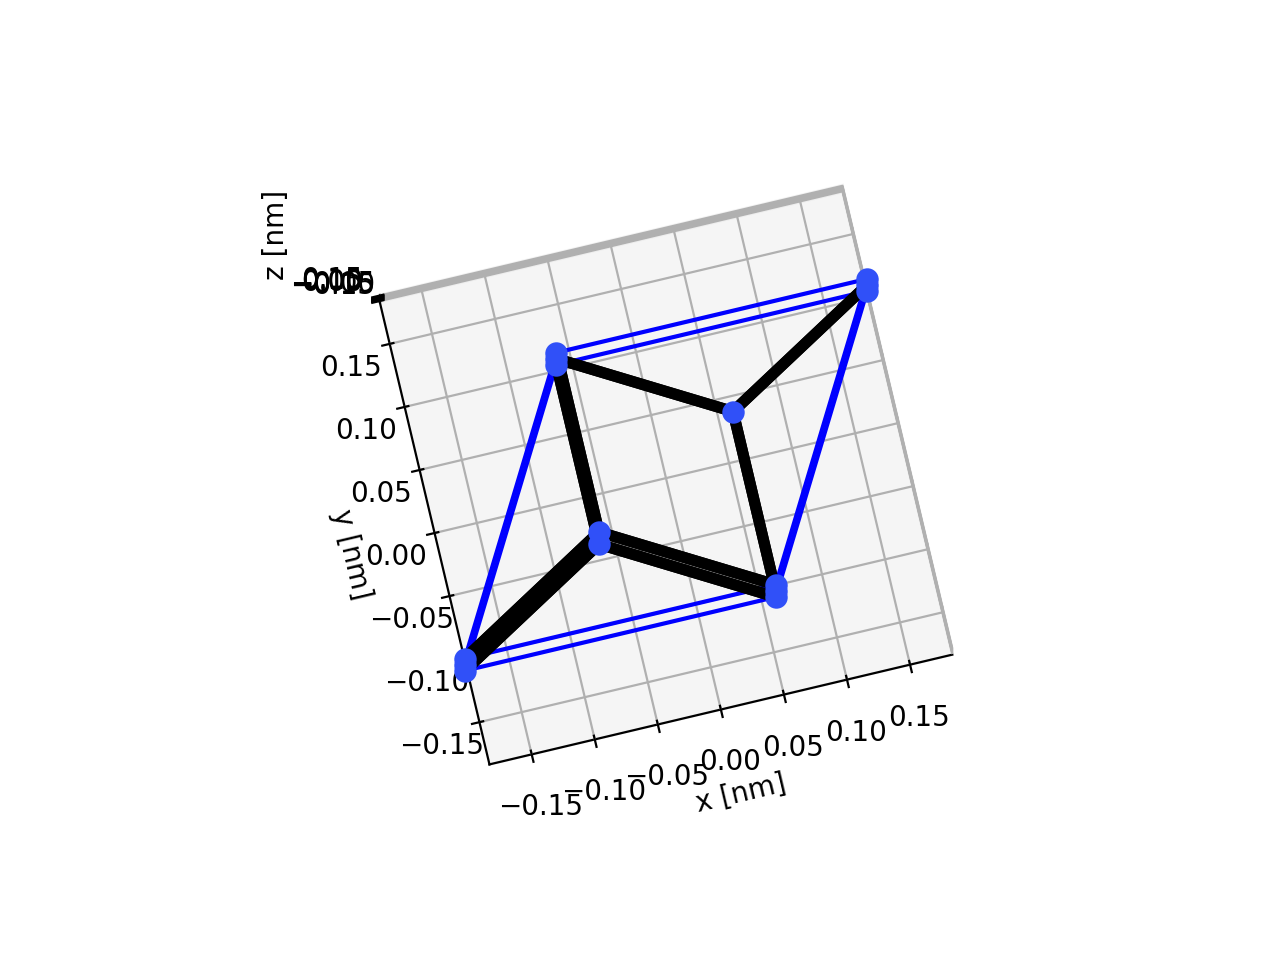

In [5]:
import pyTEMlib.KinsCat as ks # Import kinematic sCattering Library fromt he pyTEMlib

# make a structure dictionary
tags = ks.structure_by_name('Graphite')

# define bond length for plot
tags['max_bond_length'] = 0.246

# plot it in 3D
ks.plot_unitcell(tags)

Get used to changing parameters and type **silicon** instead of **Graphite** in the code cell above.

## Summary

We now have tested all tools to load data and save our analysis.

We are ready to go

## Navigation
- **Next: [Matplotlib and Numpy for Micrographs](CH1_03-Data_Representation.ipynb)**
- **UP: [Chapter 1](CH1-00-Introduction.ipynb)**
- **List of Content: [Front](_MSE672_Intro_TEM.ipynb)**

## Appendix

I am using some extensions to jupyter notebooks which can be installed with the following cells

I like mostly the table of content extension that shows where in the notebook I am and let's me jump to different parts easily.


In [ ]:
# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m jupyter nbextension list

In [ ]:
!{sys.executable} -m pip install jupyter_contrib_nbextensions

In [ ]:
!{sys.executable} -m  jupyter nbextension enable toc2

In [4]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>